In [3]:
import pandas as pd

df = pd.read_csv('starPakistan Available Job Dec 19 - Mar-21.csv')

required_columns = ['Job Name', 'City', 'Salary']

df_selected = df[required_columns]
df_selected.head()

,Job Name,City,Salary
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Islamabad,113329
1,Full Time Senior Web Developer Jobs in Pakistan,Karachi,85667
2,Full Time Russian Speakers Jobs in Pakistan,Karachi,138344
3,Full Time Customer Support Specialist - Intern...,Islamabad,88871
4,Full Time English Speaker - International Busi...,Karachi,60834


In [13]:
# performing anaggregation function on the datase with respect to all the cities and min, max and average
salary_ranges = df_selected.groupby(['Job Name', 'City']).agg(
    min_salary=('Salary', 'min'),
    max_salary=('Salary', 'max'),
    avg_salary=('Salary', 'mean')
)

top_20_records = salary_ranges.head(20)
print("Summary of Salary Ranges (Top 20 records):")
print(top_20_records.to_string())


Summary of Salary Ranges (Top 20 records):
                                                                                                        min_salary  max_salary  avg_salary
Job Name                                                                                     City                                         
Full Time  .NET Developer Or Application Developer Job in Pakistan                           Lahore          53181      128993     91087.0
Full Time  Adviser Financial Services / Assistant Branch Manager Jobs in Pakistan            Sialkot        140399      140399    140399.0
Full Time  Assistant Manager Job in Pakistan                                                 Lahore          69641       69641     69641.0
Full Time  Associate Law / Legal Advisor / Lawyer  Job in Pakistan                           Lahore         136250      136250    136250.0
Full Time  Beauty Salon / Parlour Staff Jobs in Pakistan                                     Islamabad       73845       73

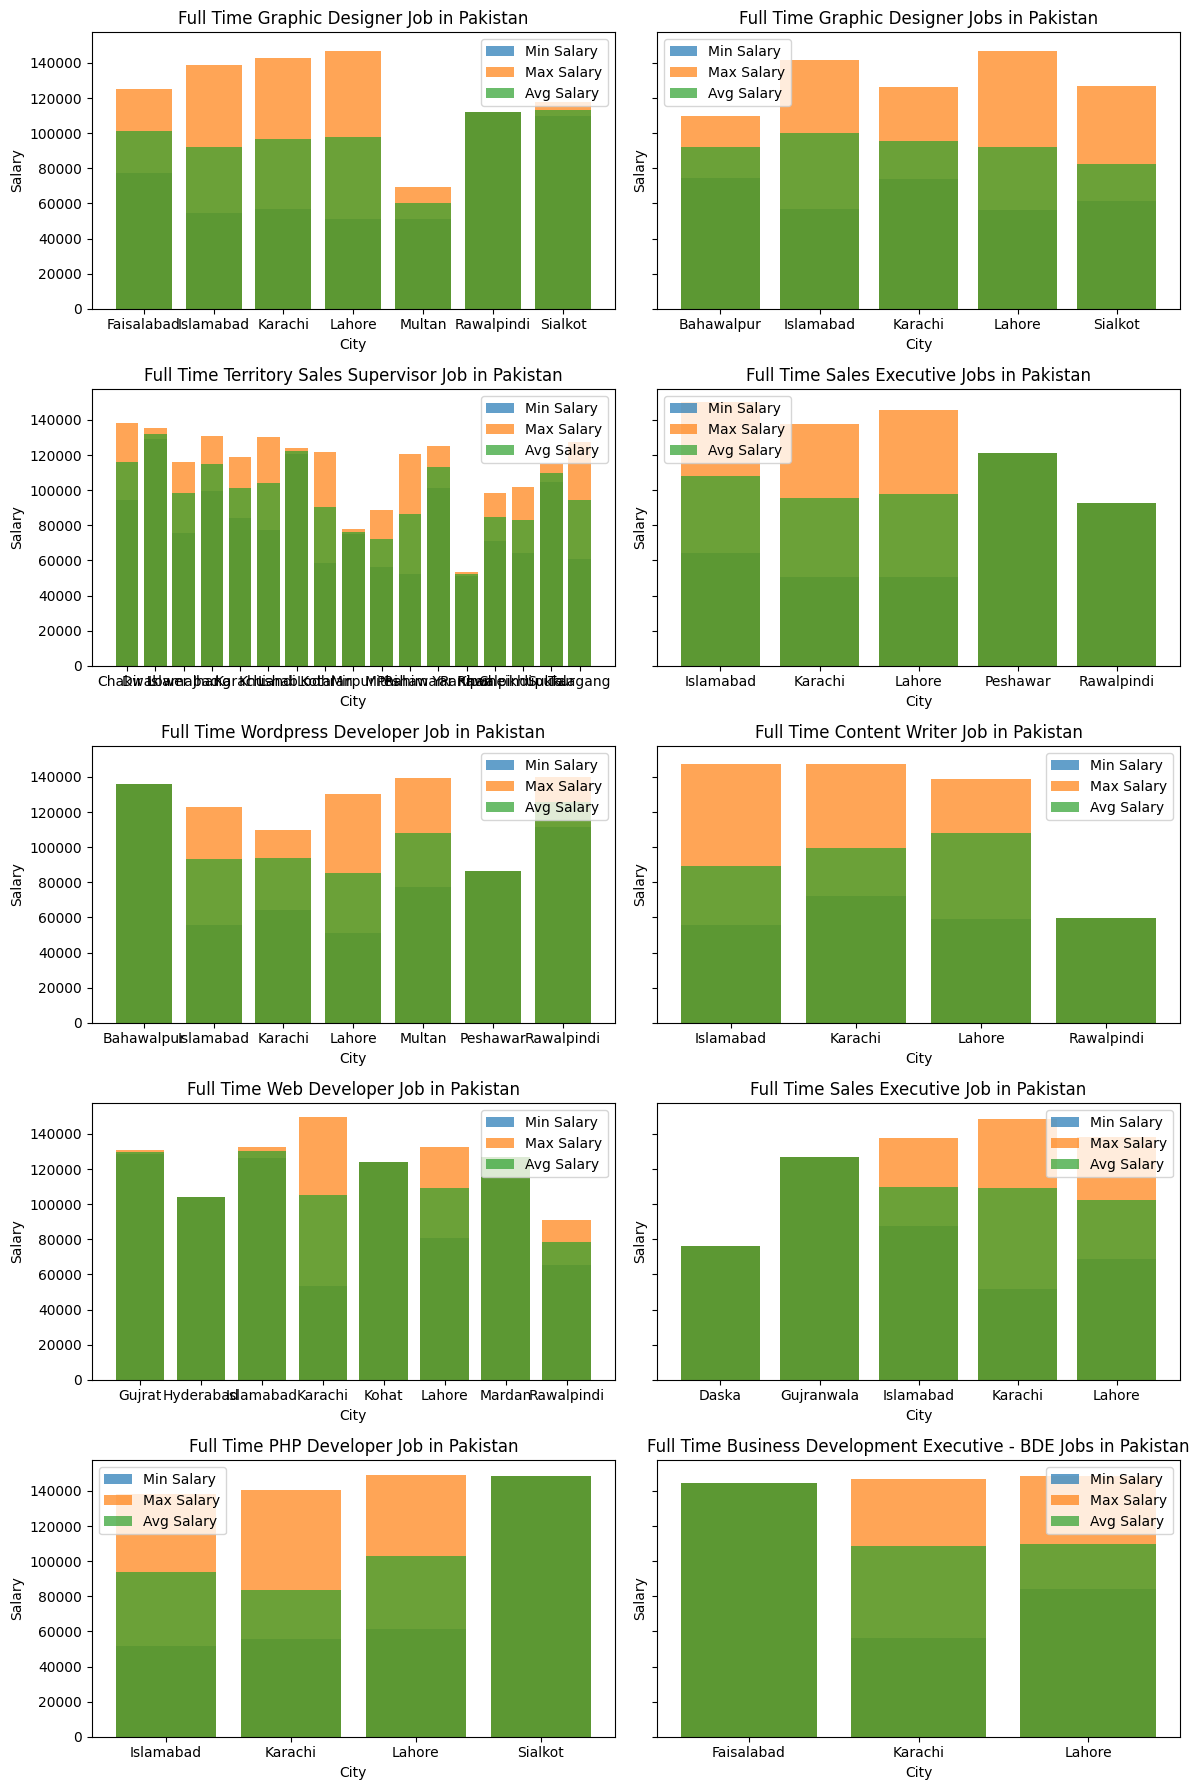

In [14]:
import matplotlib.pyplot as plt
# getting top 10 heighest paying jobs
top_10_jobs = df_selected['Job Name'].value_counts().nlargest(10).index
# generatig cub plots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18), sharey=True)
# plotting for all jobs
for i, job_name in enumerate(top_10_jobs):
    ax = axes[i // 2, i % 2]
    job_data = salary_ranges.loc[job_name]
    cities = job_data.index
    min_salaries = job_data['min_salary']
    max_salaries = job_data['max_salary']
    avg_salaries = job_data['avg_salary']

    ax.bar(cities, min_salaries, label='Min Salary', alpha=0.7)
    ax.bar(cities, max_salaries, label='Max Salary', alpha=0.7)
    ax.bar(cities, avg_salaries, label='Avg Salary', alpha=0.7)

    ax.set_title(job_name)
    ax.set_xlabel('City')
    ax.set_ylabel('Salary')
    ax.legend()

plt.tight_layout()
plt.show()
